In [87]:
# Import packages
from dateutil.parser import parse
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [67]:
### Load the data from website /csv/databse
data=pd.read_csv('https://raw.githubusercontent.com/lokeshburadkar/Time_Series_Analysis/master/airline_analysis.csv',header=None)
data.columns=['years','passenger']
print(data.shape)
data.head()

(144, 2)


,years,passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [94]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
passenger,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [69]:
data.describe(include="O")

,years
count,144
unique,144
top,1957-09
freq,1


In [70]:
print('Time period start : {}\n Time period end : {}'.format(data.years.min(),data.years.max()))

Time period start : 1949-01
 Time period end : 1960-12


In [71]:
data.columns

Index(['years', 'passenger'], dtype='object')

In [72]:
data.shape

(144, 2)

# Data Preprocessing and visualization
convert to datetime format:

In [73]:
data['years']=pd.to_datetime(data['years'],format='%Y-%m')
# set date as index 
data.set_index('years',inplace=True)
data.head()

,passenger
years,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [74]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='years', length=144, freq=None)

In [75]:
data.isnull().sum()

passenger    0
dtype: int64

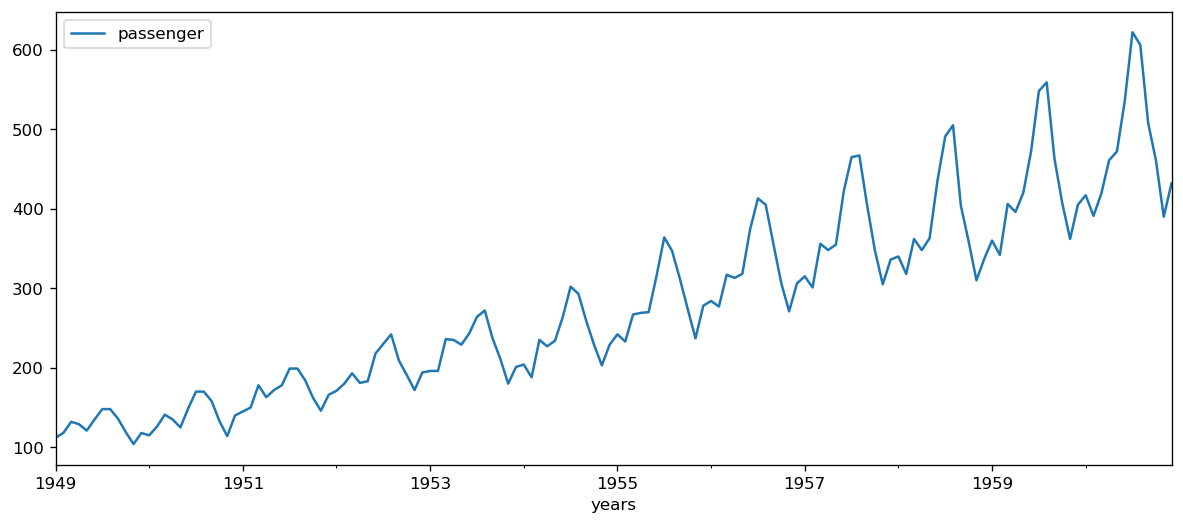

In [76]:
data.plot(figsize=(12,5))
plt.show()

# Reviewing plots of the density of observations can provide further insight into the structure of the data:

1. The distribution is not perfectly Gaussian (normal distribution).
2. The distribution is left shifted.
3. Transformations might be useful prior to modelling.

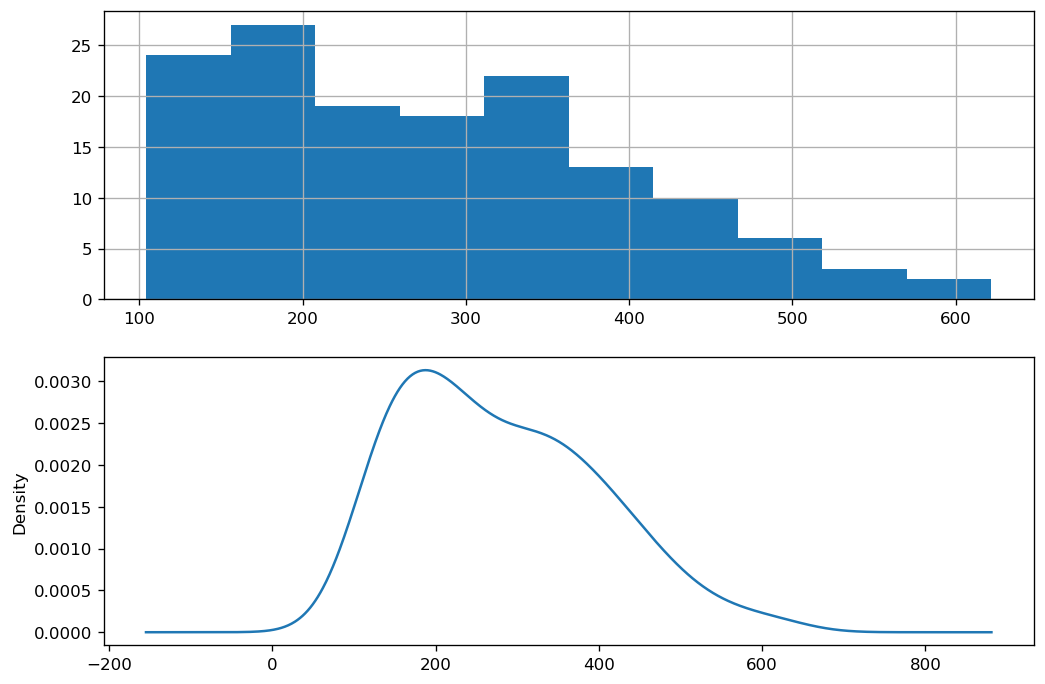

In [77]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
data.passenger.hist()
pyplot.subplot(212)
data.passenger.plot(kind="kde")
pyplot.show()


# Box and Whisker Plots:

1. Median values across years confirms an upwards trend
2. Steady increase in the spread, or middle 50% of the data (boxes) over time
3. A model considering seasonality might work well

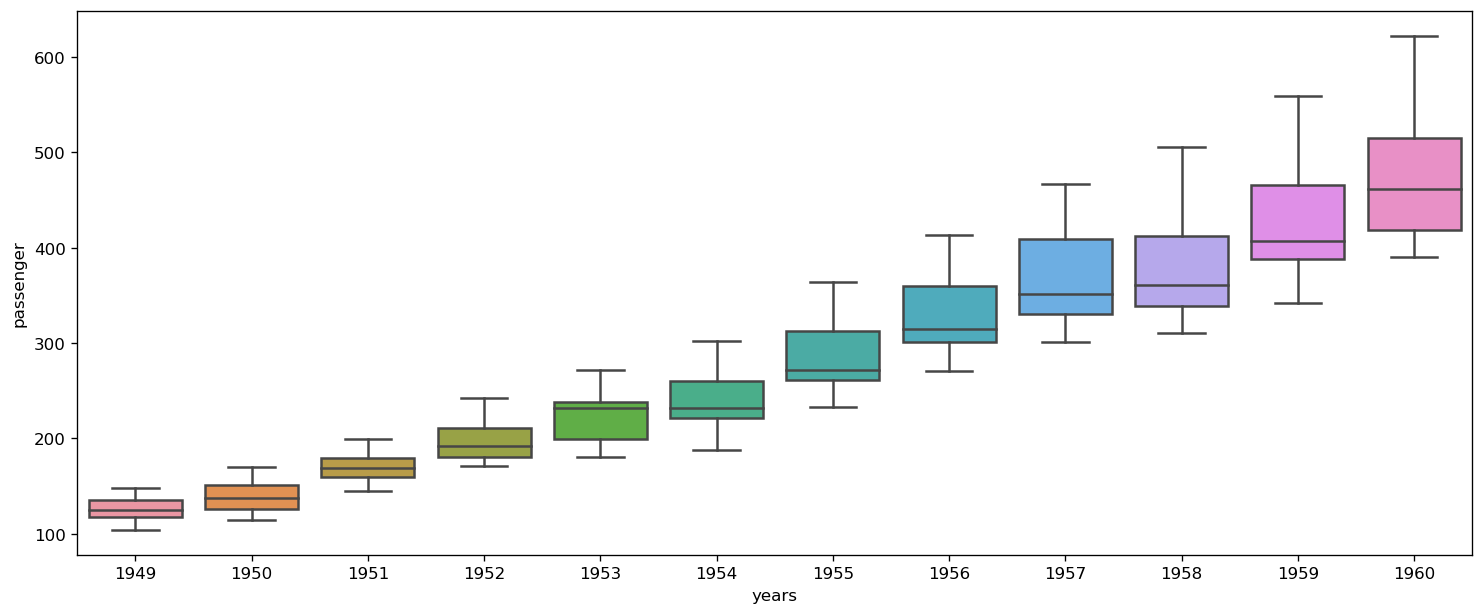

In [78]:
fig , ax= plt.subplots(figsize=(15,6))
sns.boxplot(data.passenger.index.year,data.passenger,ax=ax)


# Decomposing using statsmodel:

1. We can use statsmodels to perform a decomposition of this time series.
2. The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.
3. With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

In [84]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
# from pyramid.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from fbprophet import Prophet

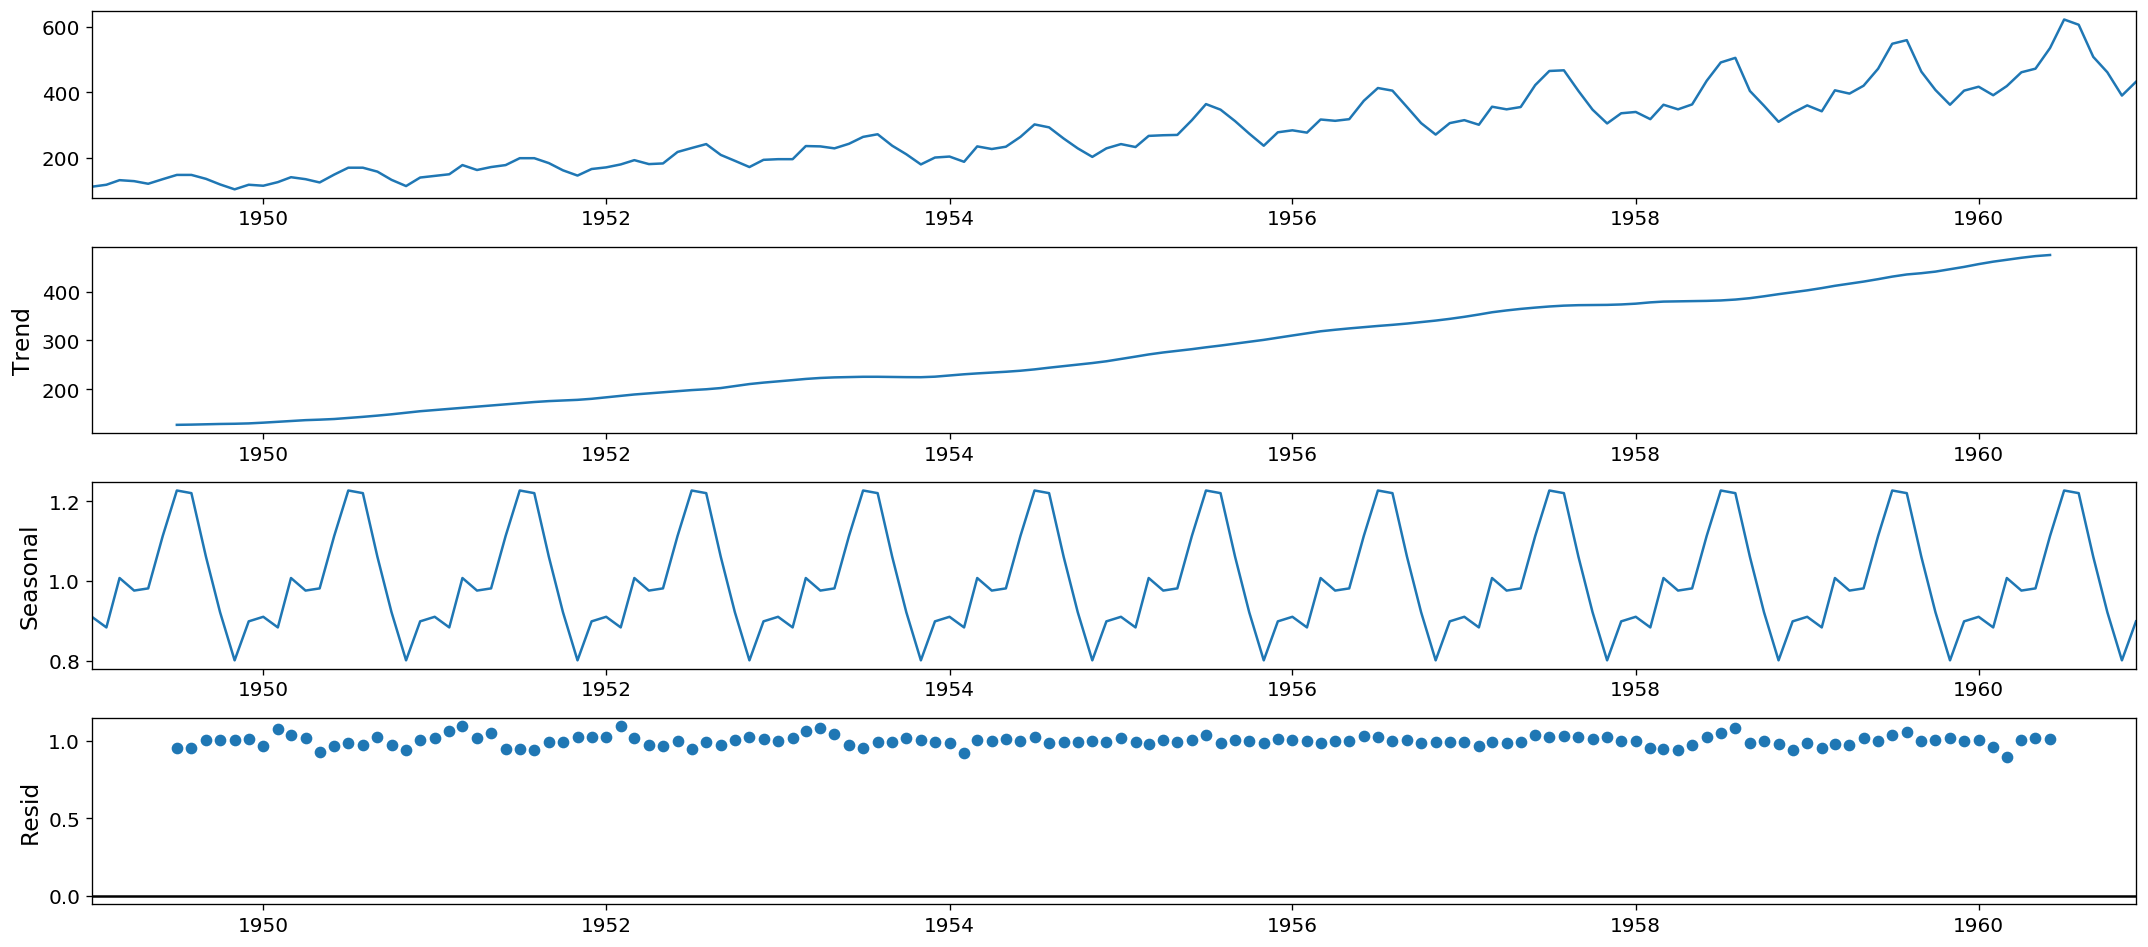

In [88]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(data,model='mupliplicative')
fig=decomposition.plot()
plt.show()

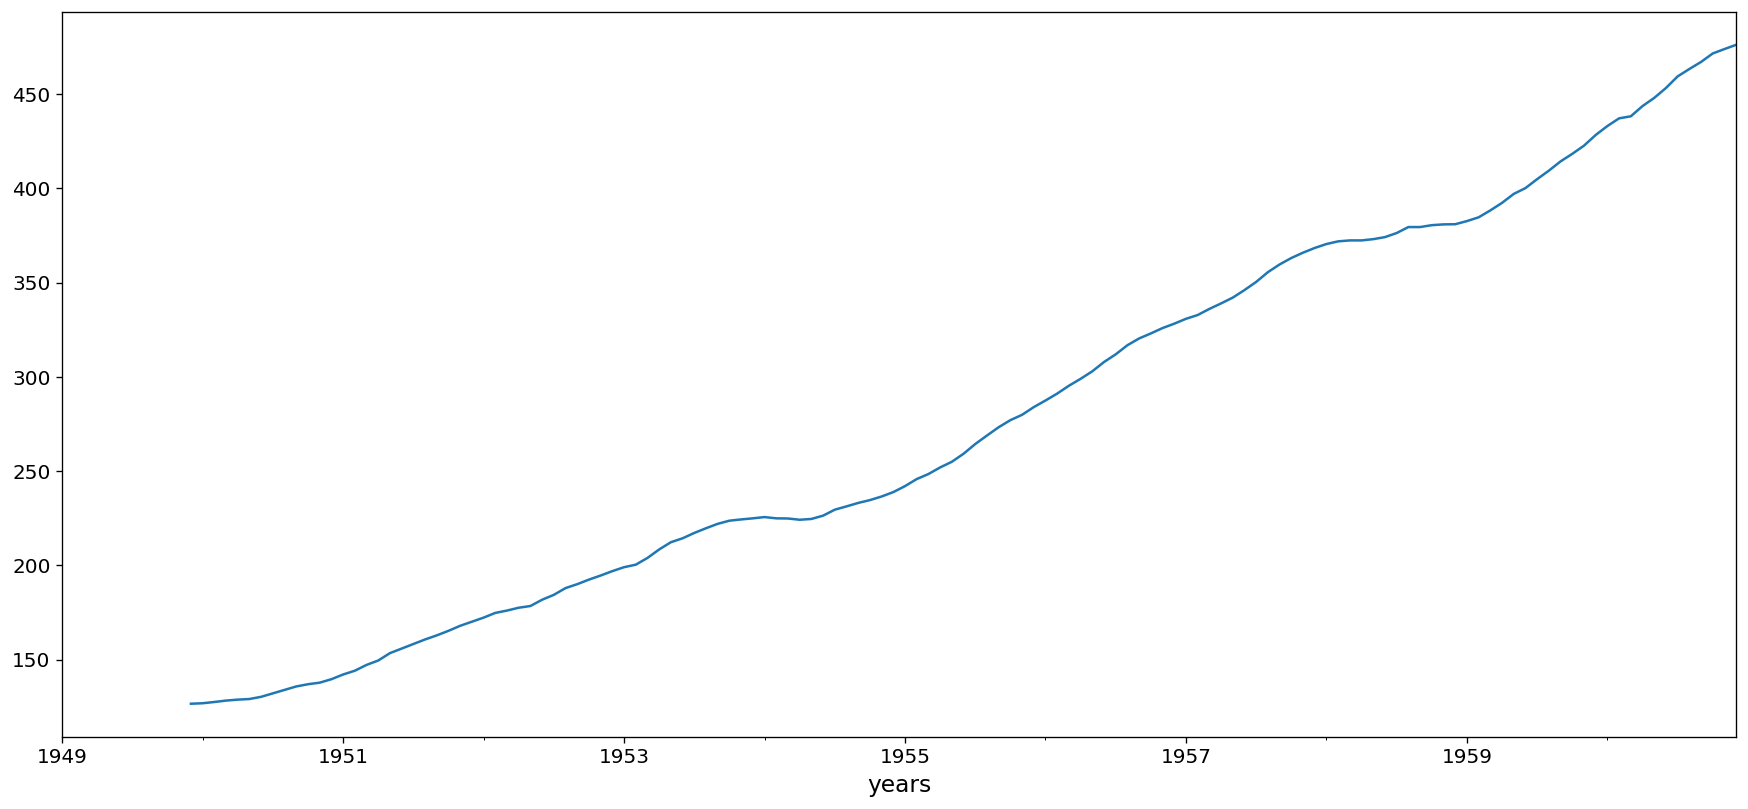

In [97]:
data.passenger.rolling(12).mean().plot(label="12 month rolling mean")

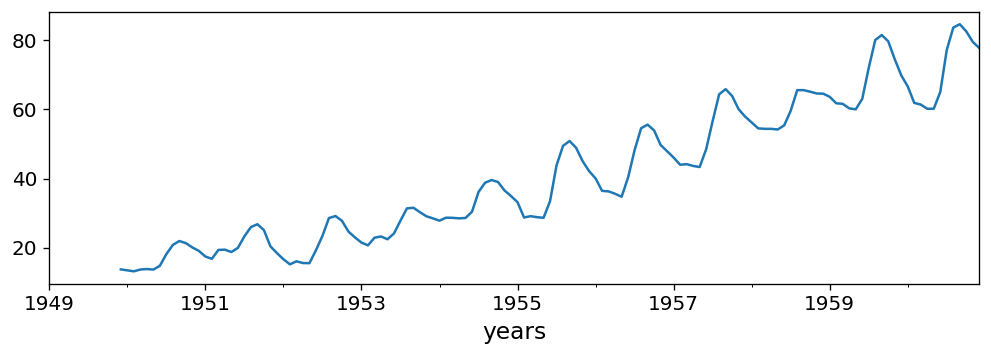

In [101]:
data.passenger.rolling(12).std().plot(label="12 month rolling std",figsize=(10,3))

In [110]:
timeseries=data.passenger # convert to series 

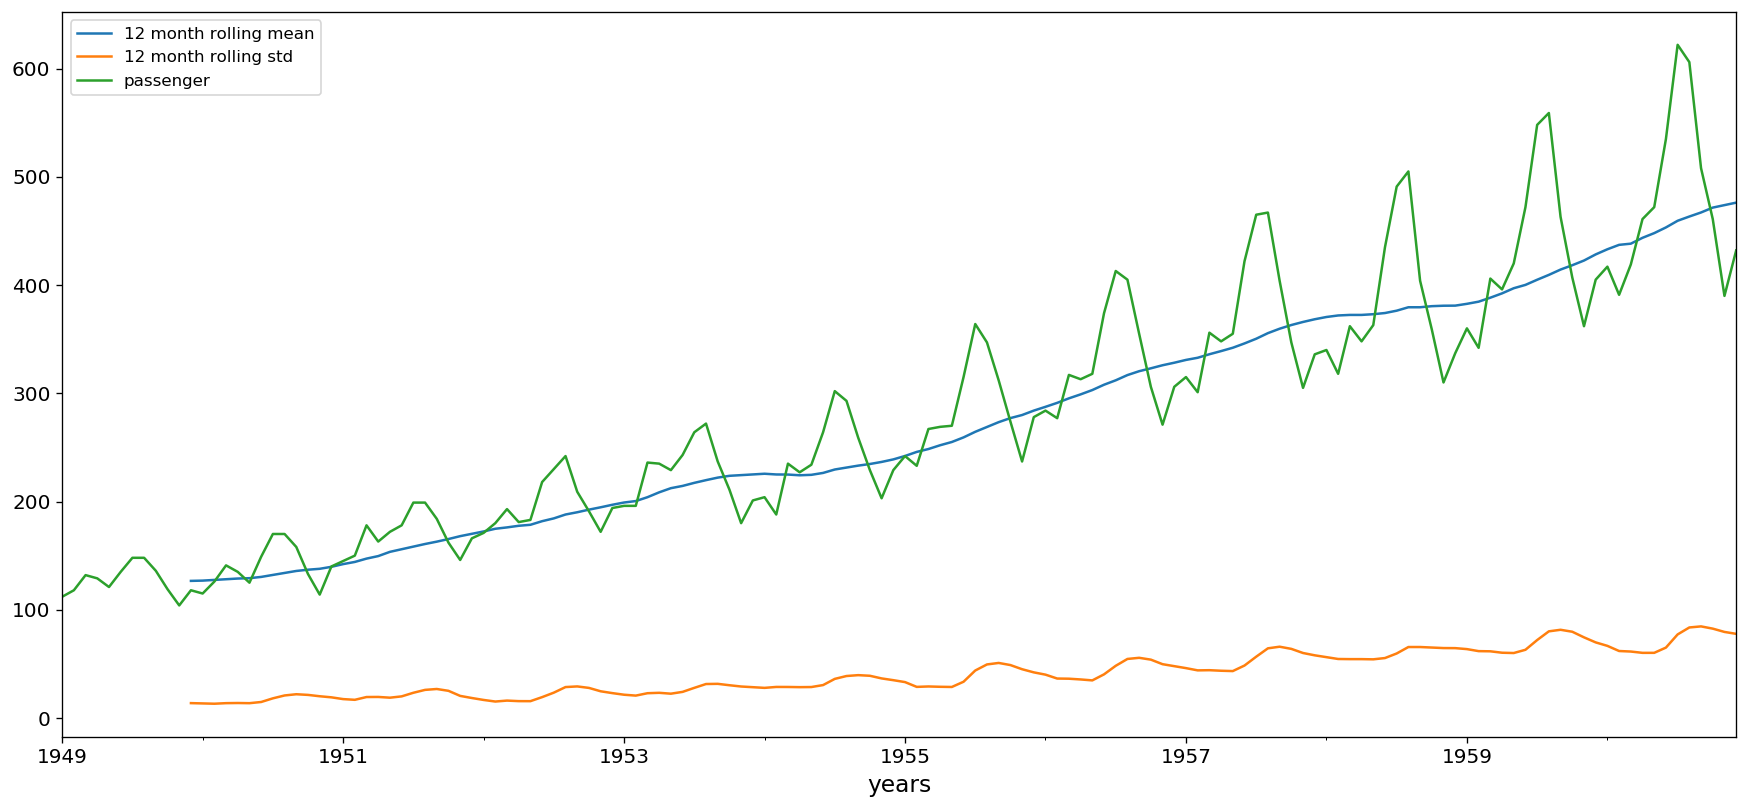

In [111]:
timeseries.rolling(12).mean().plot(label="12 month rolling mean")
timeseries.rolling(12).std().plot(label="12 month rolling std")
timeseries.plot()
plt.legend()

<Figure size 2160x960 with 0 Axes>

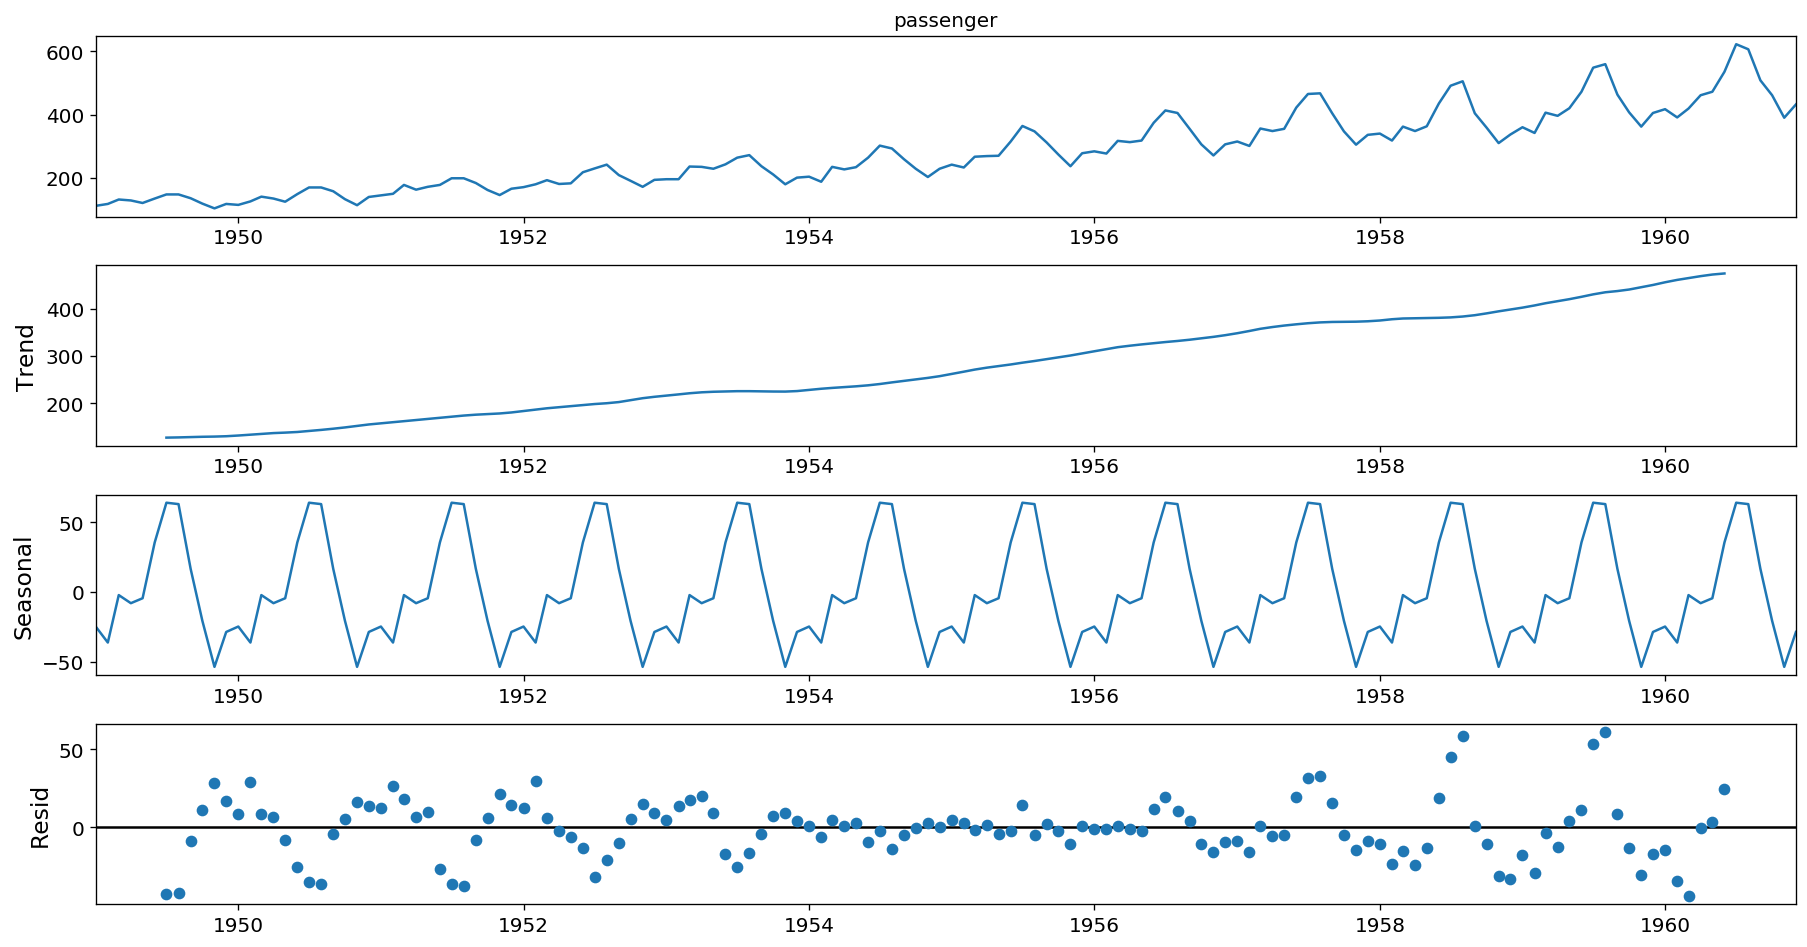

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data['passenger'],freq=12)
fig=plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

In [116]:
## test to check data is seasonal or not 
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [117]:
adf_check(data.passenger)

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.8153688792060456
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [118]:
data["passenger_diff_one_m"]=data['passenger']-data['passenger'].shift(1)

In [119]:
data.head()

,passenger,passenger_diff_one_m
years,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [121]:
adf_check(data.passenger_diff_one_m.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.8292668241699817
p-value : 0.05421329028382789
#Lags Used : 12
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


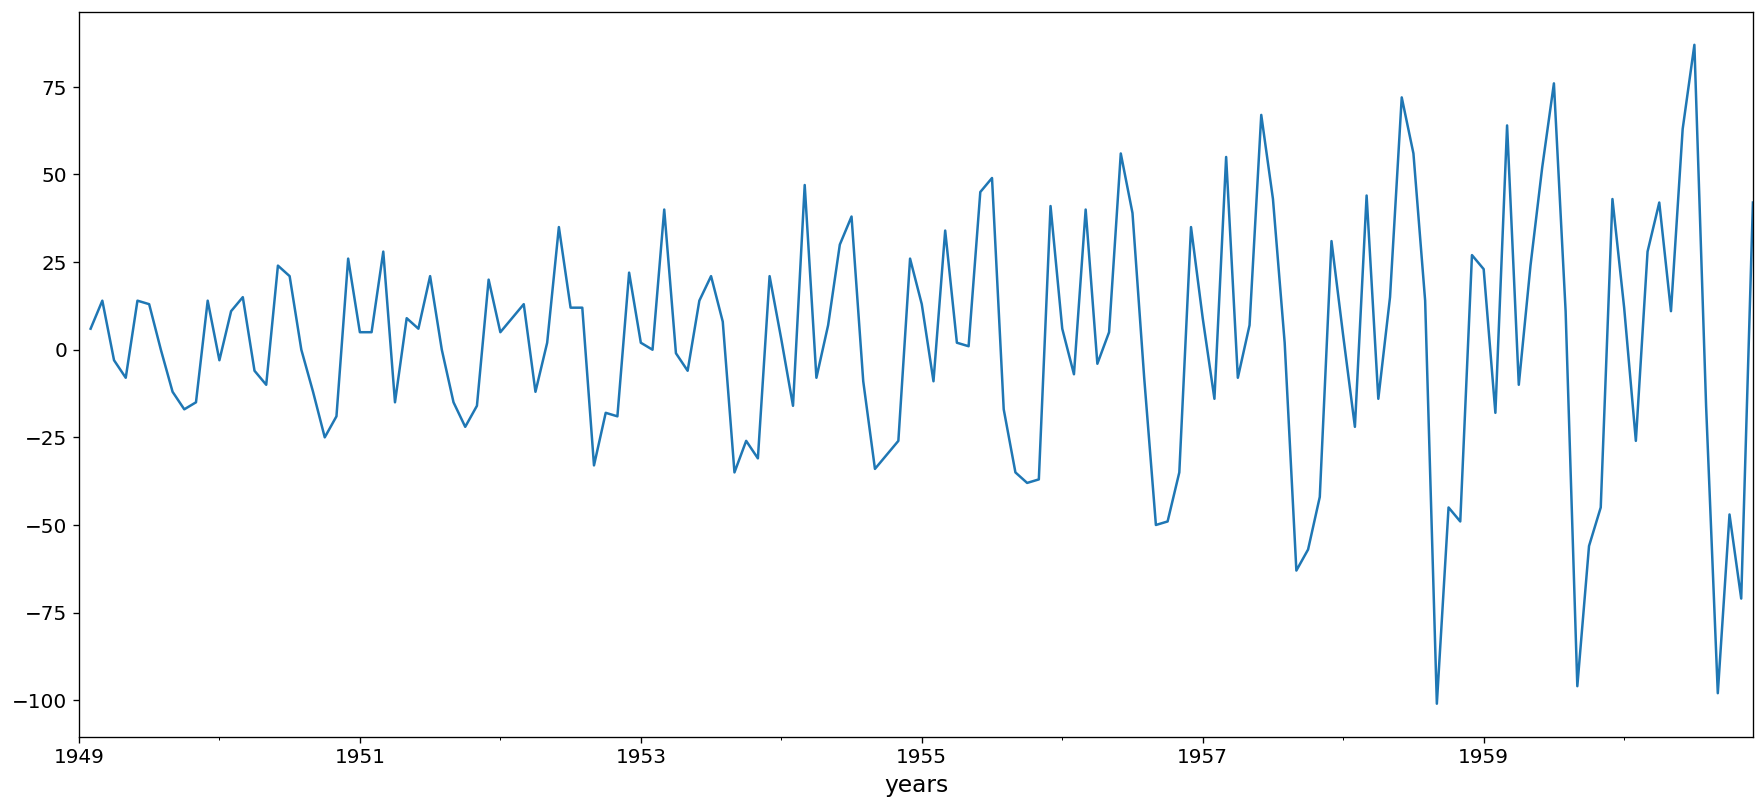

In [122]:
data.passenger_diff_one_m.plot()

In [123]:
data["passenger_diff_12_mon"]=data['passenger']-data['passenger'].shift(12)

In [124]:
adf_check(data.passenger_diff_12_mon.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.3830207264924796
p-value : 0.011551493085515008
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


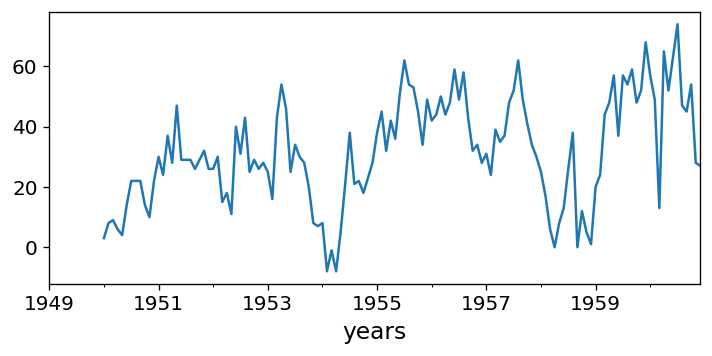

In [131]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
data['passenger_diff_12_mon'].plot(figsize=(7,3))

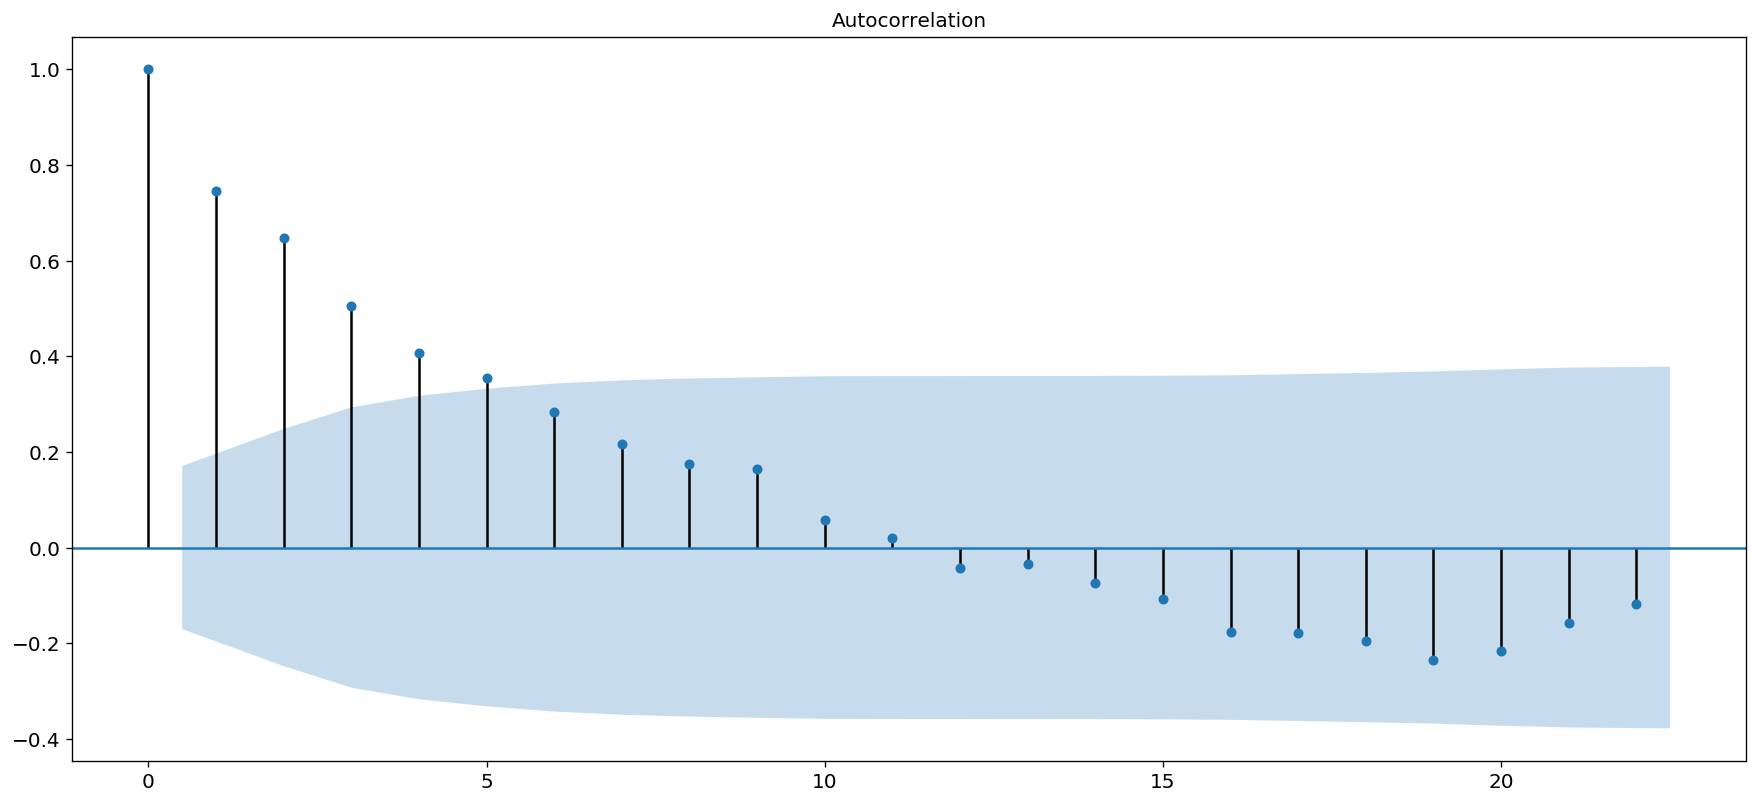

In [132]:
fig_first=plot_acf(data['passenger_diff_12_mon'].dropna())

In [135]:
data1=data['passenger_diff_12_mon'].dropna()
data1.head()

years
1950-01-01    3.0
1950-02-01    8.0
1950-03-01    9.0
1950-04-01    6.0
1950-05-01    4.0
Name: passenger_diff_12_mon, dtype: float64

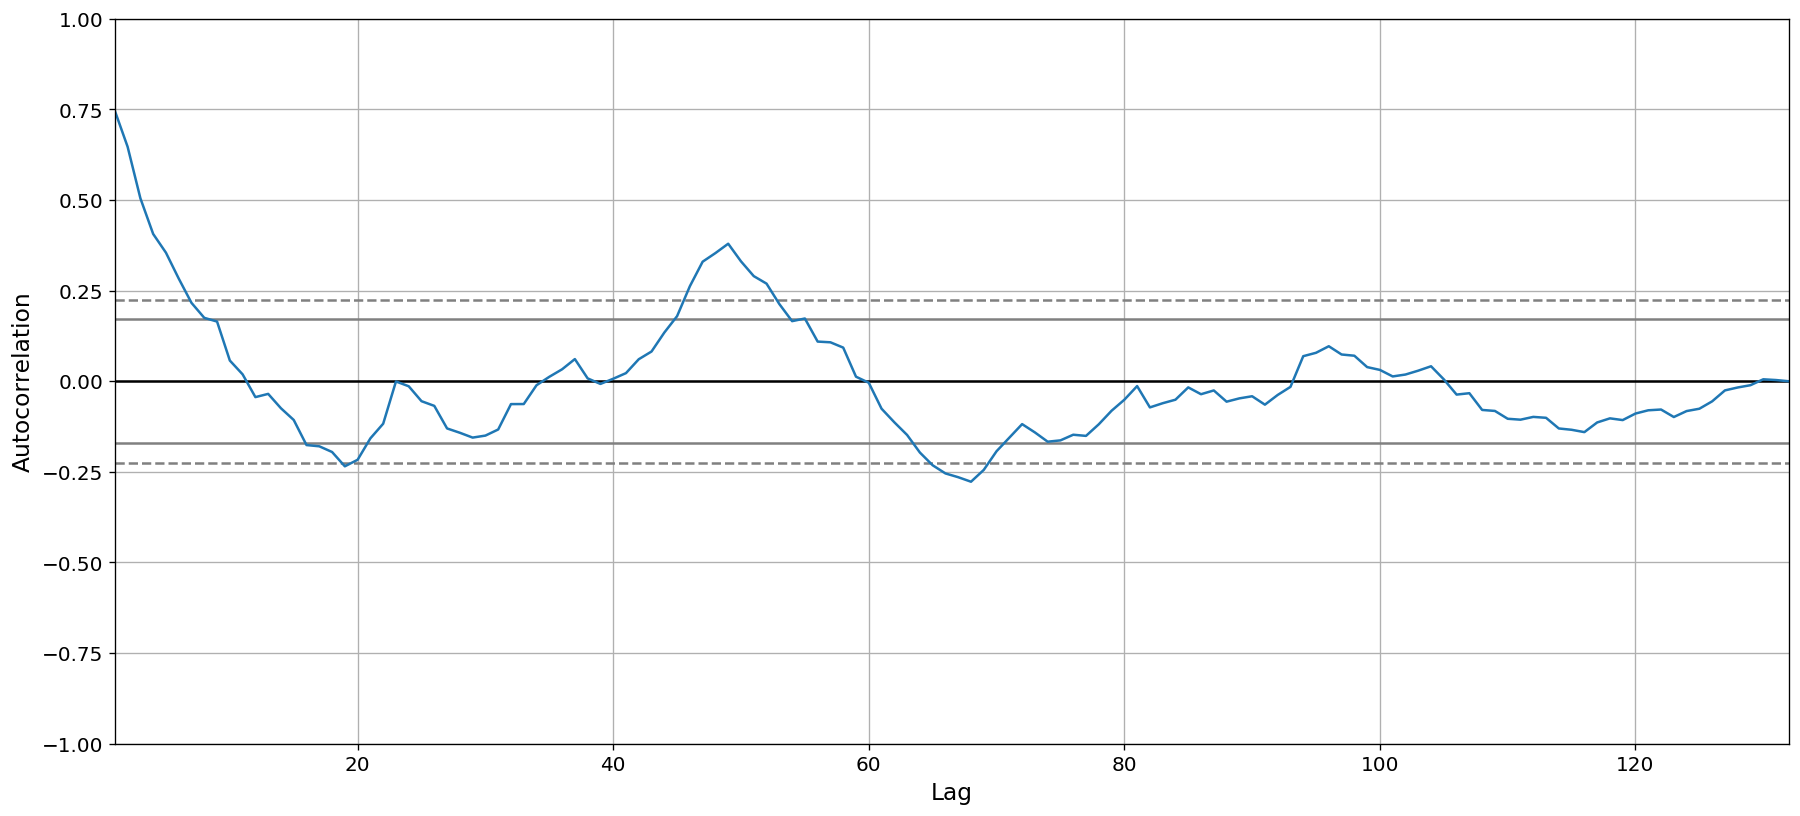

In [137]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['passenger_diff_12_mon'].dropna())

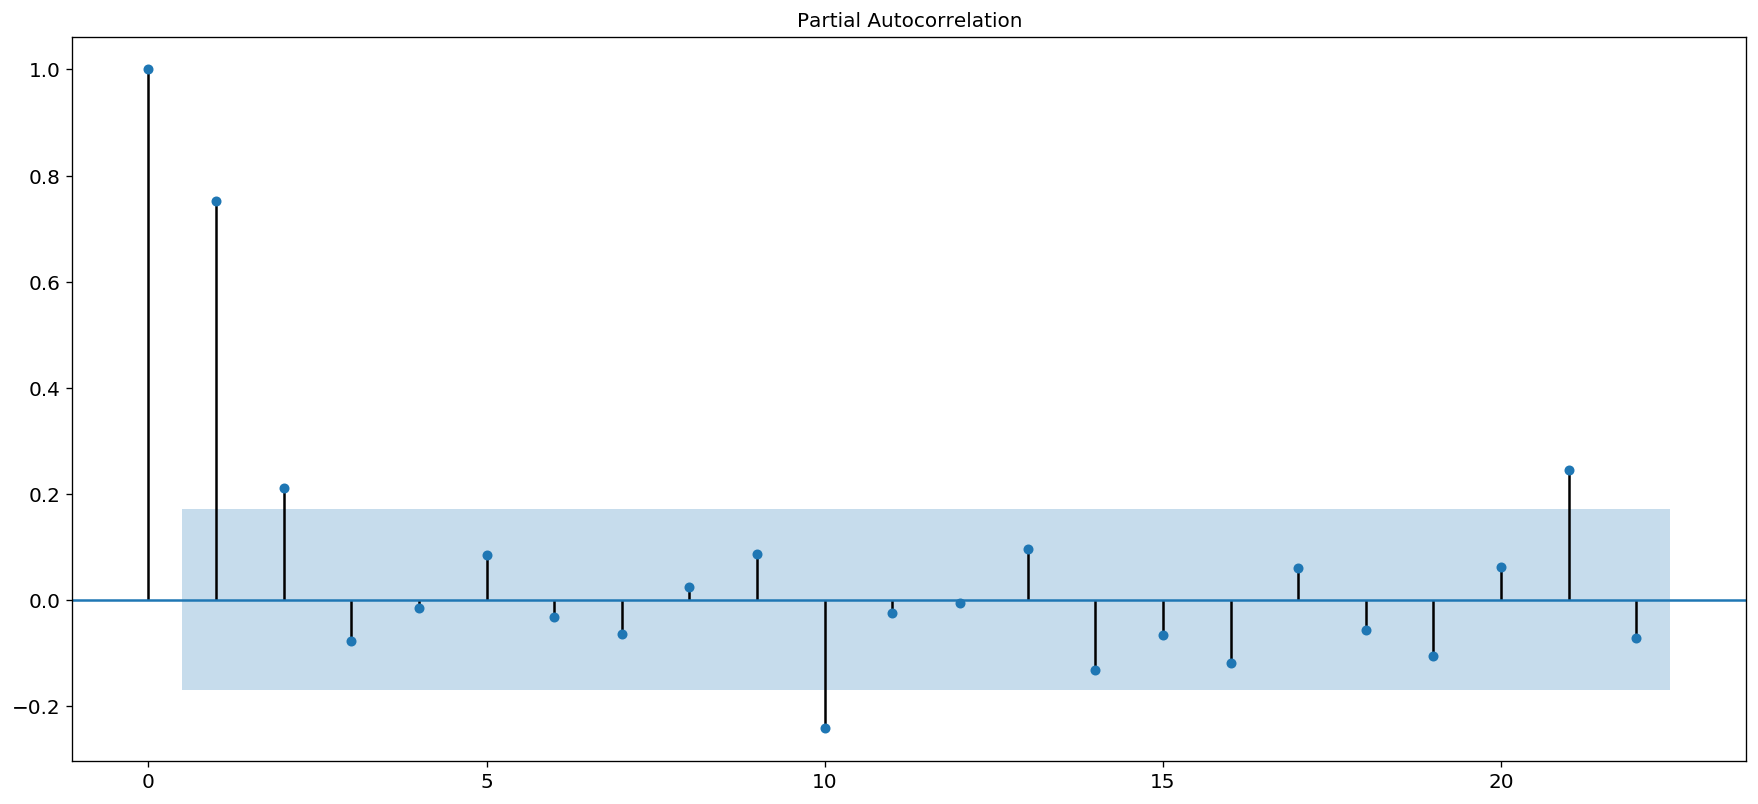

In [138]:
result = plot_pacf(data["passenger_diff_12_mon"].dropna())

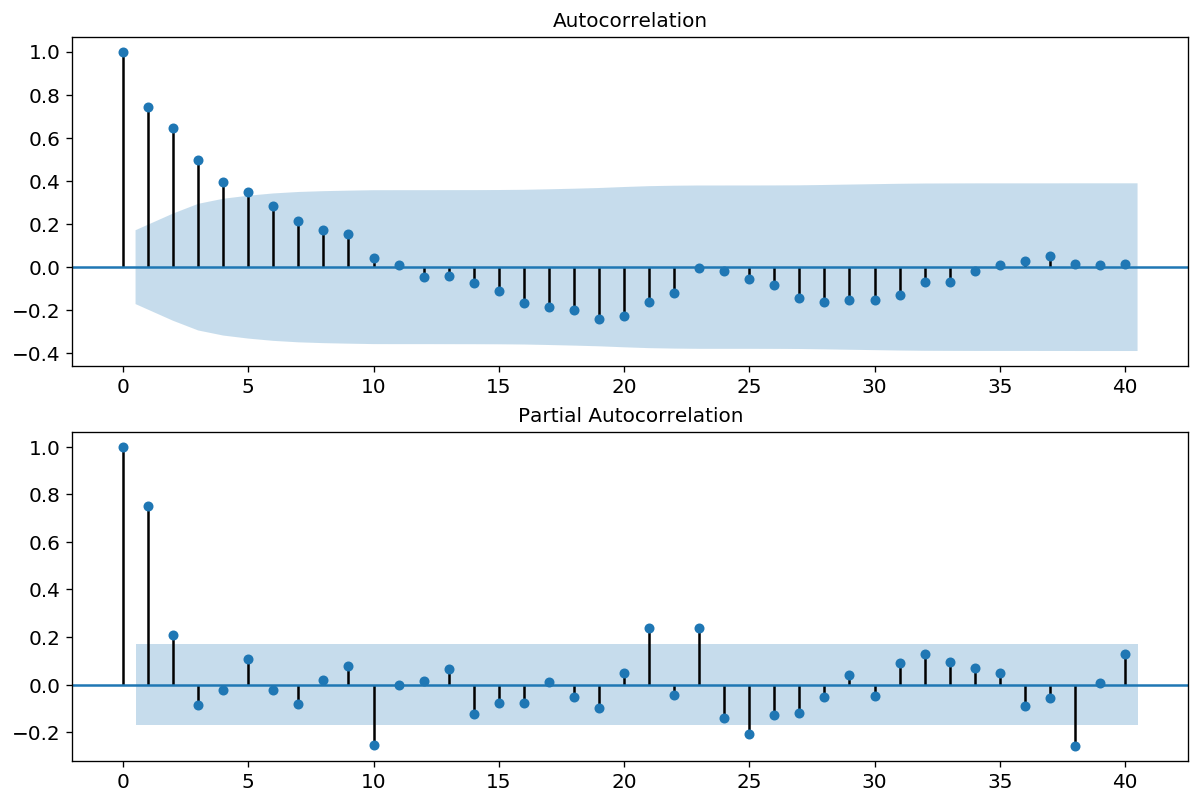

In [139]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['passenger_diff_12_mon'].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['passenger_diff_12_mon'].iloc[13:],lags = 40, ax = ax2)

In [140]:
from statsmodels.tsa.arima_model import ARIMA

In [145]:
model=sm.tsa.statespace.SARIMAX(data['passenger'],order=(0,1,0),seasonal_order=(1,1,1,12))
result=model.fit()
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            passenger   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -513.064
Date:                              Sat, 04 Jul 2020   AIC                           1032.128
Time:                                      13:36:00   BIC                           1040.753
Sample:                                  01-01-1949   HQIC                          1035.633
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4435      0.527     -0.841      0.400      -1.477       0.590
ma.S.L12       0.27

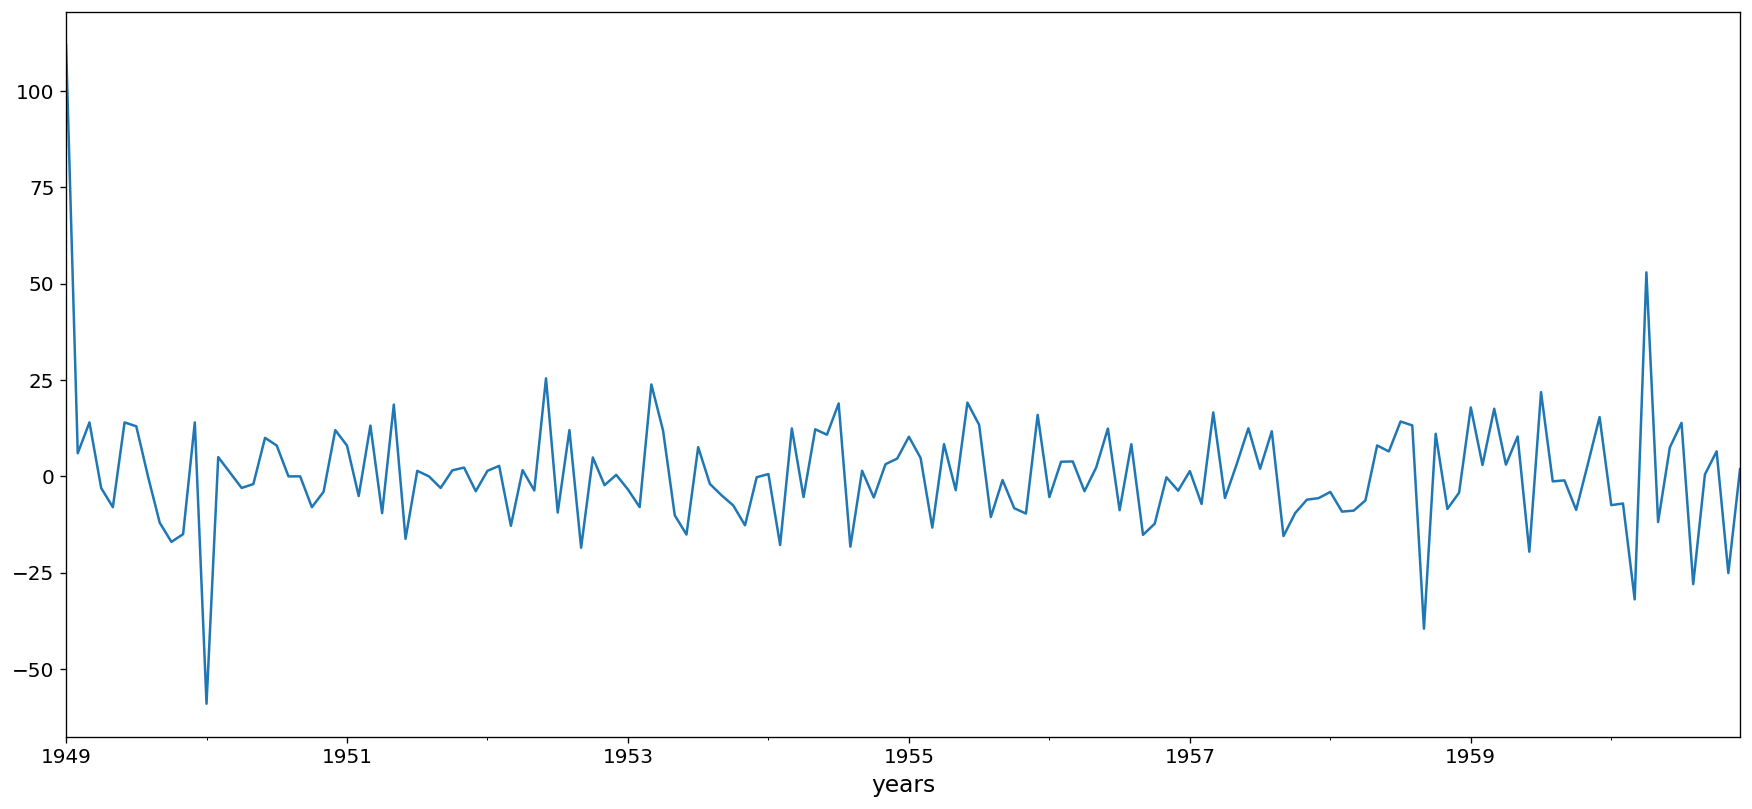

In [146]:
result.resid.plot()

In [147]:
data.shape

(144, 3)

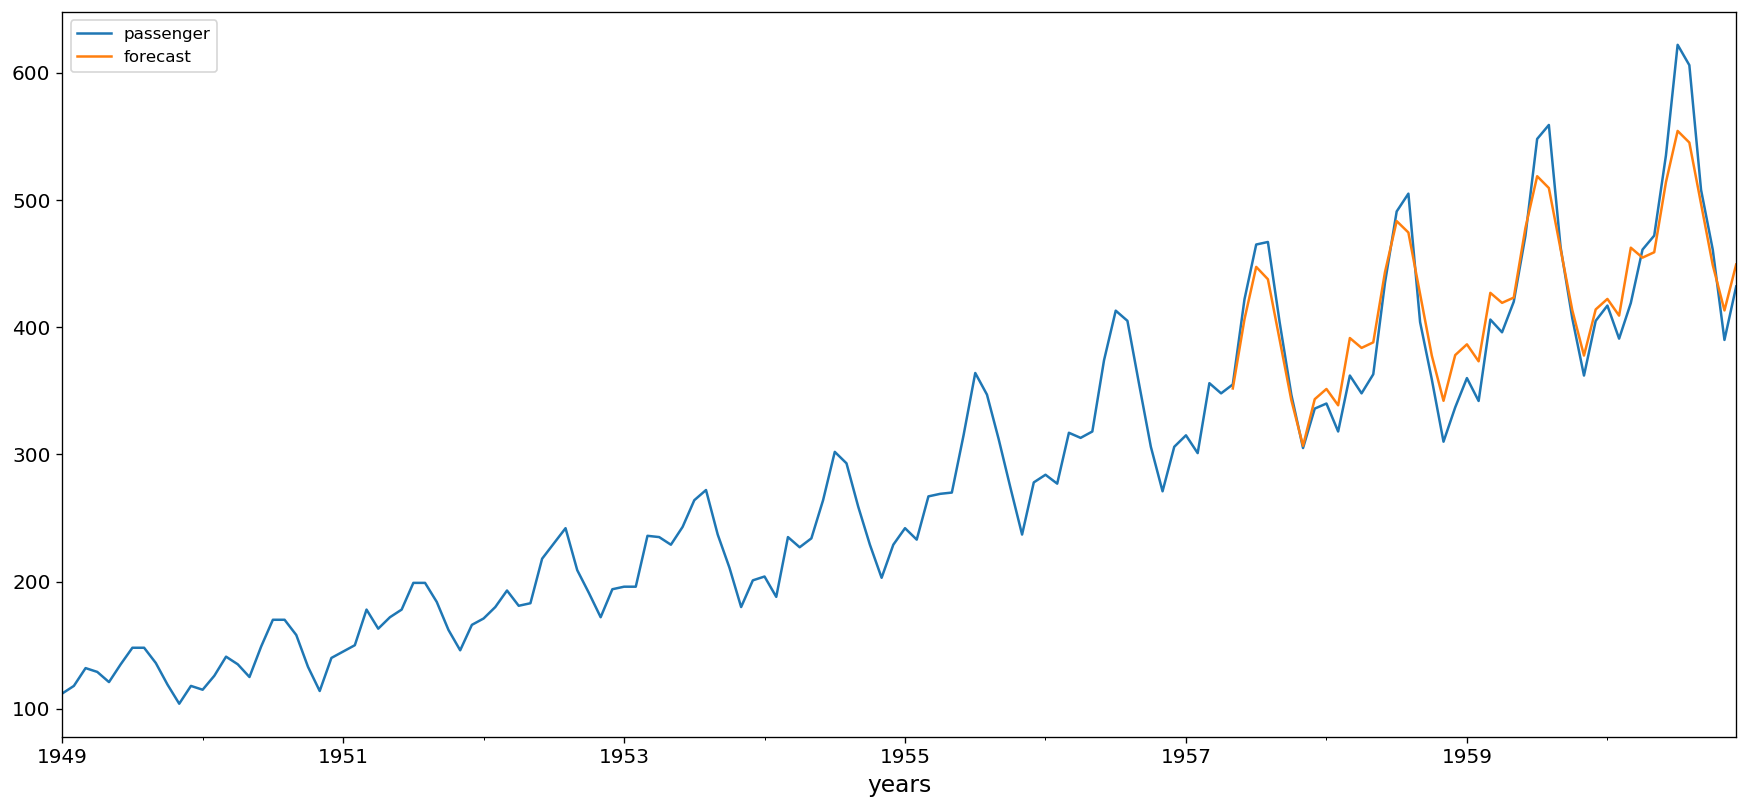

In [152]:
data['forecast']=result.predict(start=100,end=144,dynamic=True)
data[['passenger','forecast']].plot()

In [153]:
data.tail()

,passenger,passenger_diff_one_m,passenger_diff_12_mon,forecast
years,,,,
1960-08-01,606,-16.0,47.0,545.160561
1960-09-01,508,-98.0,45.0,496.825069
1960-10-01,461,-47.0,54.0,448.836052
1960-11-01,390,-71.0,28.0,413.201541
1960-12-01,432,42.0,27.0,449.297492


In [154]:
from pandas.tseries.offsets import DateOffset

In [157]:
further_date=[data.index[-1] + DateOffset(months=x) for x in range(0,24)]
further_date

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [160]:
future_date_Df=pd.DataFrame(index=further_date[1:],columns=data.columns)
future_date_Df.head()

,passenger,passenger_diff_one_m,passenger_diff_12_mon,forecast
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN


In [162]:
future_date_pred=pd.concat([data,future_date_Df])
future_date_pred.head()

,passenger,passenger_diff_one_m,passenger_diff_12_mon,forecast
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN


In [163]:
future_date_pred.tail()

,passenger,passenger_diff_one_m,passenger_diff_12_mon,forecast
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


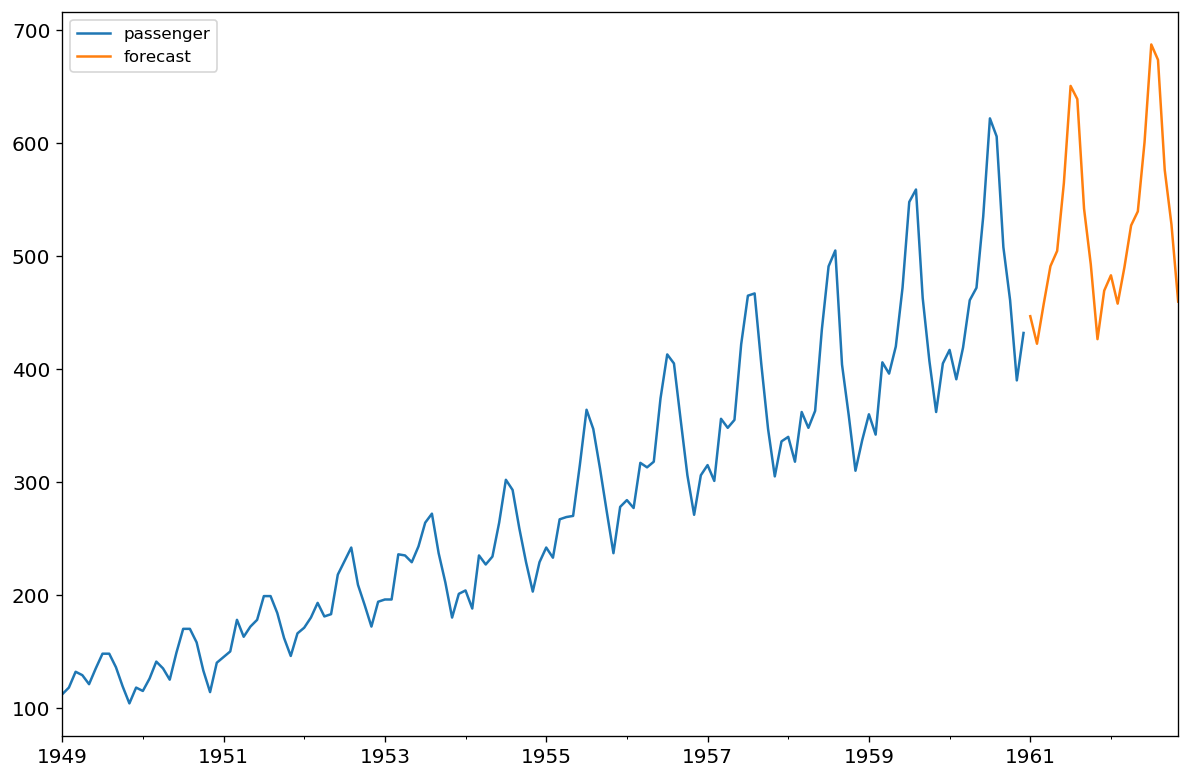

In [174]:
future_date_pred['forecast'] = result.predict(start = 144, end = 144+24,dynamic= True)  
future_date_pred[['passenger', 'forecast']].plot(figsize = (12, 8))


In [176]:
future_date_pred[144:]

,passenger,passenger_diff_one_m,passenger_diff_12_mon,forecast
1961-01-01,NaN,NaN,NaN,446.836190
1961-02-01,NaN,NaN,NaN,422.460096
1961-03-01,NaN,NaN,NaN,457.691671
1961-04-01,NaN,NaN,NaN,491.111318
1961-05-01,NaN,NaN,NaN,504.638042
1961-06-01,NaN,NaN,NaN,564.804931
1961-07-01,NaN,NaN,NaN,650.725308
1961-08-01,NaN,NaN,NaN,639.047212
1961-09-01,NaN,NaN,NaN,542.071785
1961-10-01,NaN,NaN,NaN,492.858701
